<h4>Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h5>Reading csv file for EDA

In [2]:
job=pd.read_csv("aug_train.csv")
print("File read successfully")

File read successfully


<h8><b>So, what is the dataset about?

This dataset is used to predict if a candidate will look for a new job after training.

<h5>At starting we will get the data details with the help of info function

In [3]:
job.info() #check datatype for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

<h5>head function to quickly check how data looks at begining,clarifying column name and data type</h5>

In [4]:
job.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


<h5>Tail function to See if the dataset ends cleanly.

In [5]:
job.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0
19157,23834,city_67,0.855,NaN,No relevent experience,no_enrollment,Primary School,NaN,2,NaN,NaN,1,127,0.0


<b>Get to know how many rows and columns are there

In [6]:
job.shape

(19158, 14)

In [7]:
job.columns.values                    #To get all the column names

array(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'], dtype=object)

In [8]:
job.index.values                     #to get overview of index values

array([    0,     1,     2, ..., 19155, 19156, 19157], shape=(19158,))

In [9]:
job.describe() #To get basic statistical knowledge about numerical data

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [10]:
job.isnull()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,True,False,False,False
3,False,False,False,True,False,True,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,False,False,False,False,False,False,False,False,False,True,True,False,False,False
19154,False,False,False,False,False,False,False,False,False,True,True,False,False,False
19155,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19156,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [11]:
job.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<h4>Converting integer data into numeric for making correlation matrix</h4>

In [12]:
job["enrollee_id"]=pd.to_numeric(job["enrollee_id"],errors='coerce')
job["city_development_index"]=pd.to_numeric(job["city_development_index"],errors='coerce')
job["training_hours"]=pd.to_numeric(job["training_hours"],errors='coerce')

<h4>Creating Correlation Analysis

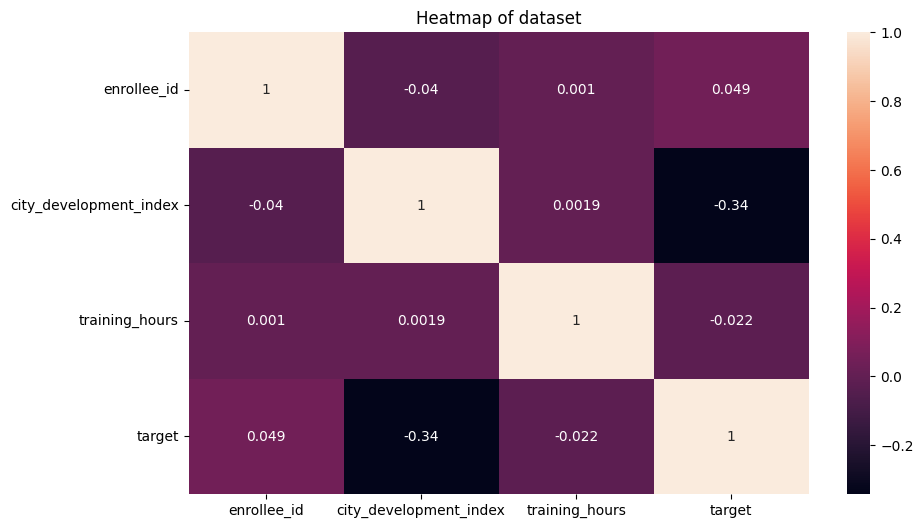

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(job[['enrollee_id','city_development_index','training_hours','target']].corr(),annot=True)
plt.title("Heatmap of dataset")
plt.show()

<b>Gender Distribution
Explanation: Shows the breakdown of male, female, and unknown gender candidates.

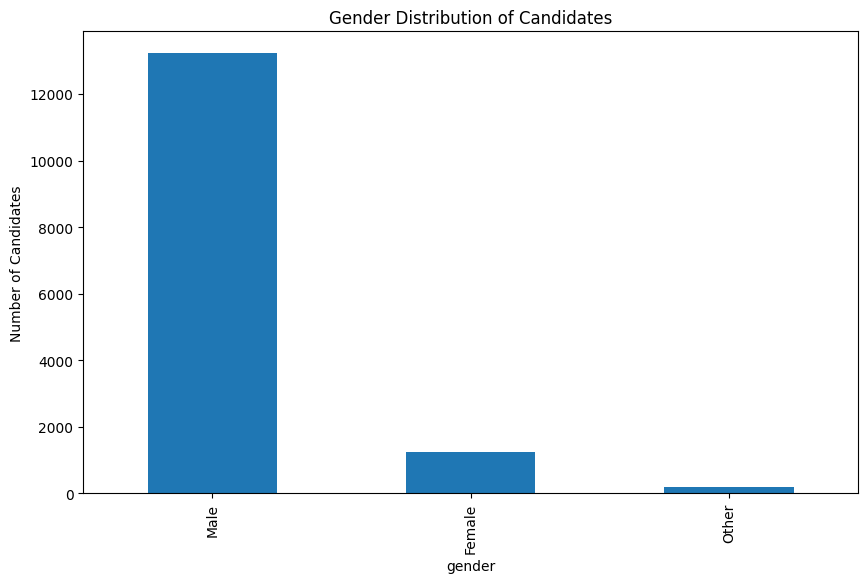

In [14]:
plt.figure(figsize=(10,6))
job['gender'].value_counts().plot(kind='bar')
plt.title("Gender Distribution of Candidates")
plt.ylabel("Number of Candidates")
plt.show()

<b>Enrollment Status
Explanation: Displays how many candidates are currently enrolled in university programs.

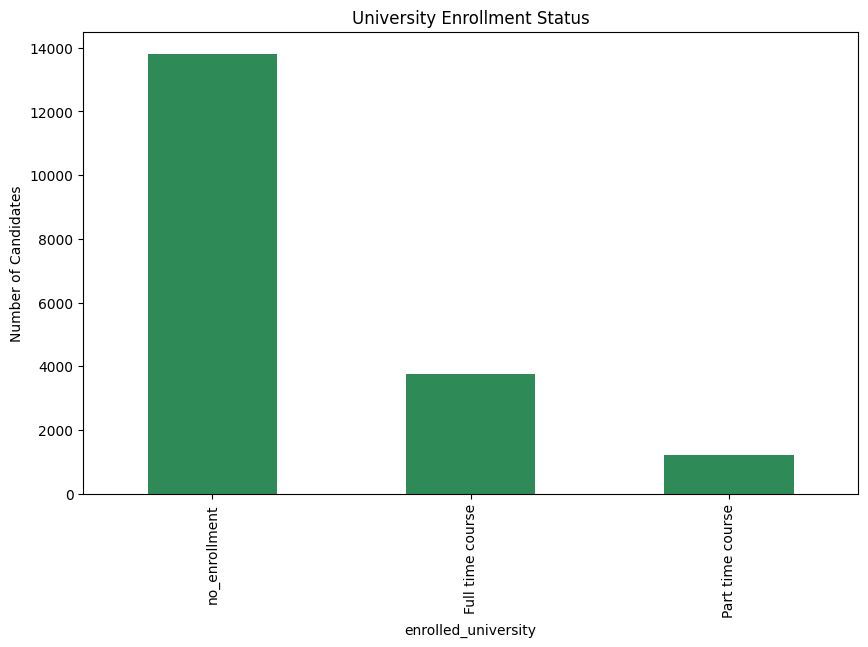

In [15]:
plt.figure(figsize=(10,6))
job['enrolled_university'].value_counts().plot(kind='bar',color='seagreen')
plt.title("University Enrollment Status")
plt.ylabel("Number of Candidates")
plt.show()

<b>Company Size Distribution
Reveals what size companies candidates currently work for.

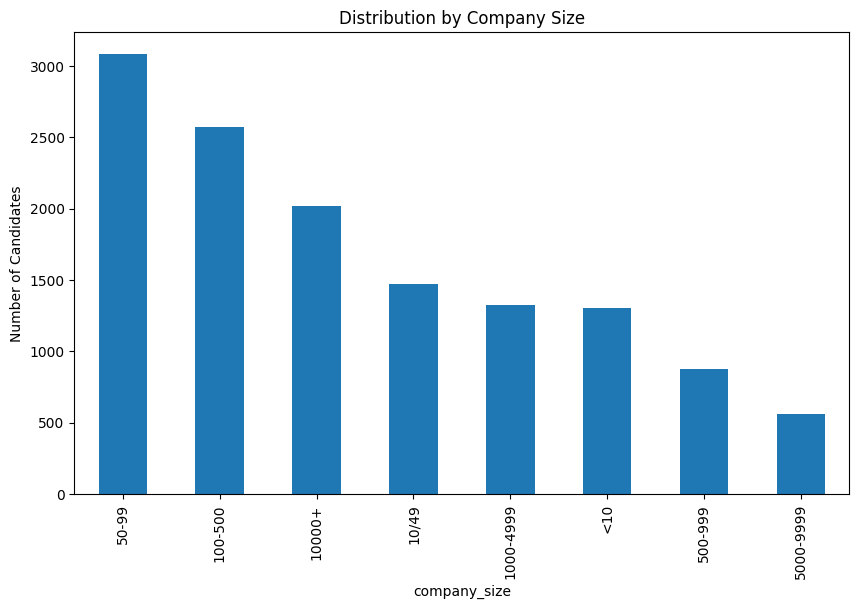

In [16]:
plt.figure(figsize=(10,6))
job['company_size'].value_counts().plot(kind='bar')
plt.title("Distribution by Company Size")
plt.ylabel("Number of Candidates")
plt.show()

<b>Company Type Distribution Reveals what type of companies candidates currently work for.

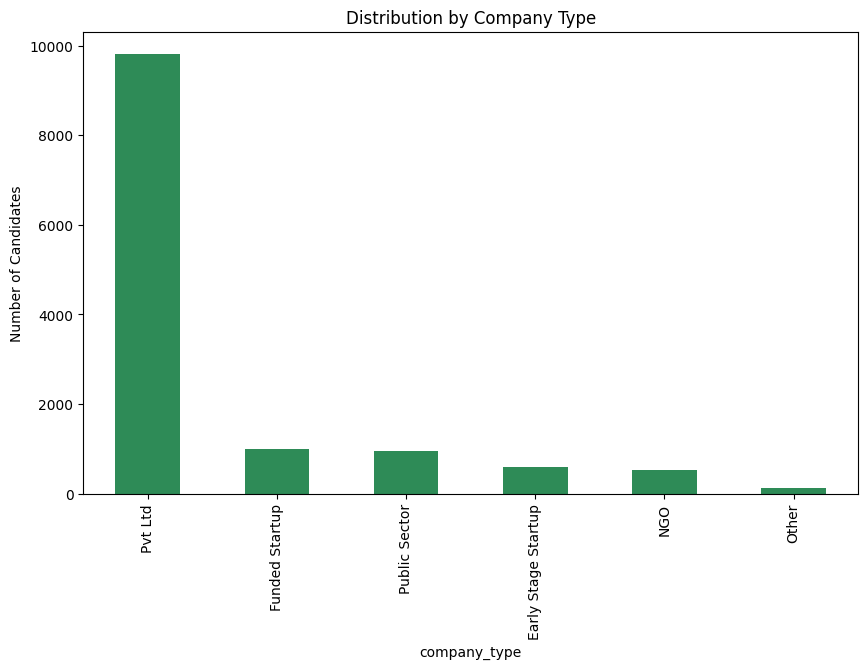

In [17]:
plt.figure(figsize=(10,6))
job['company_type'].value_counts().plot(kind='bar',color='seagreen')
plt.title("Distribution by Company Type")
plt.ylabel("Number of Candidates")
plt.show()

<b>How many people are looking for job change based on their training hours

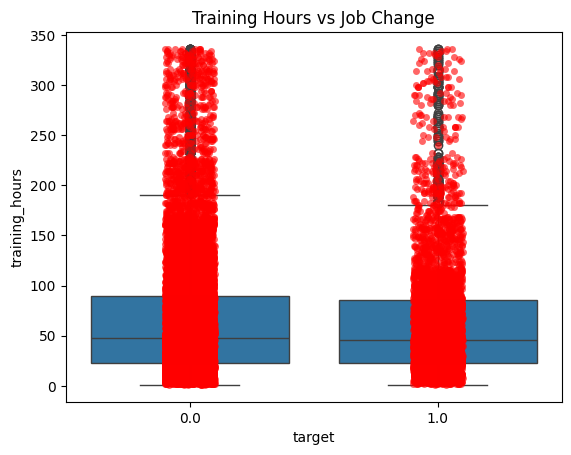

In [18]:
sns.boxplot(x='target', y='training_hours', data=job)
sns.stripplot(x='target', y='training_hours', data=job, color='red', jitter=True, alpha=0.6)
plt.title('Training Hours vs Job Change')
plt.show()
